In [123]:
import pandas as pd
import numpy as np

In [124]:
#Load the dataset

df = pd.read_csv(r"H:\Machine Learning\PROJECTS\SMS-Spam-Detection\spam.csv", encoding='cp1252')

In [125]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
1721,ham,Am watching house ‰ÛÒ very entertaining ‰ÛÒ am...,NaN,NaN,NaN
2000,ham,But i'll b going 2 sch on mon. My sis need 2 t...,NaN,NaN,NaN
3784,ham,Let me know if you need anything else. Salad o...,NaN,NaN,NaN
3994,ham,R u in this continent?,NaN,NaN,NaN
5251,ham,"Yeah work is fine, started last week, all the ...",NaN,NaN,NaN


In [126]:
df.shape

(5572, 5)

In [127]:
#1 Data Cleaning
#2 EDA
#3 Text Preprocessing
#4 Model Building
#5 Model Evaluation
#6 Improvements
#7 Web App
#8 Deployment

#1 Data Cleaning

In [128]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [129]:
# drop last 3 columns

df.drop(columns = ['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace = True)

In [130]:
df.sample(5)

,v1,v2
3707,spam,Free Top ringtone -sub to weekly ringtone-get ...
76,ham,Thats cool. i am a gentleman and will treat yo...
3000,spam,This message is free. Welcome to the new & imp...
3384,ham,Ok can...
4333,ham,Boo what time u get out? U were supposed to ta...


In [131]:
#Renaming the columns

df.rename(columns = {'v1': 'target', 'v2': 'text'}, inplace = True)

In [132]:
df.sample(5)

,target,text
3513,ham,I always chat with you. In fact i need money c...
1487,ham,I told your number to gautham..
238,ham,"New Theory: Argument wins d SITUATION, but los..."
3405,ham,\HEY DAS COOL... IKNOW ALL 2 WELLDA PERIL OF S...
2458,ham,"Cool, I'll text you when I'm on the way"


In [133]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [134]:
df['target'] = encoder.fit_transform(df['target'])

In [135]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [136]:
#check for null values
df.isnull().sum()

target    0
text      0
dtype: int64

In [137]:
#check for duplicate values
df.duplicated().sum()

np.int64(403)

In [138]:
#Rename the duplicate values

df = df.drop_duplicates(keep ='first')

In [139]:
df.duplicated().sum()

np.int64(0)

In [140]:
df.shape

(5169, 2)

#2 EDA

In [141]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [142]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

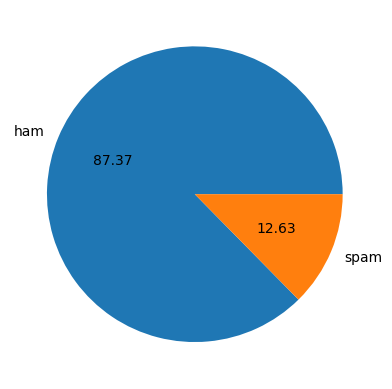

In [143]:
import matplotlib.pyplot as plt

plt.pie(df['target'].value_counts(), labels = ['ham','spam'], autopct = '%0.2f')
plt.show()

Data is imbalanced

In [144]:
# Checking number of text, words and sentences in the text column.

In [161]:
import re
nltk.download('punkt')
from nltk.tokenize import sent_tokenize

# Count number of characters
df['num_characters'] = df['text'].apply(len)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Ebad\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [146]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [147]:
# Count number of words
df['num_words'] = df['text'].apply(lambda x: len(x.split()))

In [148]:
df.head(5)

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,20
1,0,Ok lar... Joking wif u oni...,29,6
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,28
3,0,U dun say so early hor... U c already then say...,49,11
4,0,"Nah I don't think he goes to usf, he lives aro...",61,13


In [149]:
# Count sentences using regex
df['num_sentences'] = df['text'].apply(lambda x: len(re.findall(r'[.!?]+', x)))

In [150]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,20,3
1,0,Ok lar... Joking wif u oni...,29,6,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,28,1
3,0,U dun say so early hor... U c already then say...,49,11,2
4,0,"Nah I don't think he goes to usf, he lives aro...",61,13,0


In [151]:
df[['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,15.340685,1.846779
std,58.236293,11.068488,1.745441
min,2.000000,1.000000,0.000000
25%,36.000000,7.000000,1.000000
50%,60.000000,12.000000,2.000000
75%,117.000000,22.000000,3.000000
max,910.000000,171.000000,39.000000


In [152]:
#ham messages
df[df['target'] == 0][['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,14.134632,1.692648
std,56.358207,11.116240,1.681598
min,2.000000,1.000000,0.000000
25%,34.000000,7.000000,1.000000
50%,52.000000,11.000000,1.000000
75%,90.000000,18.000000,2.000000
max,910.000000,171.000000,39.000000


In [153]:
#spam messages
df[df['target'] == 1][['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,23.681470,2.912711
std,30.137753,5.967672,1.806610
min,13.000000,2.000000,0.000000
25%,132.000000,22.000000,2.000000
50%,149.000000,25.000000,3.000000
75%,157.000000,28.000000,4.000000
max,224.000000,35.000000,9.000000


In [154]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

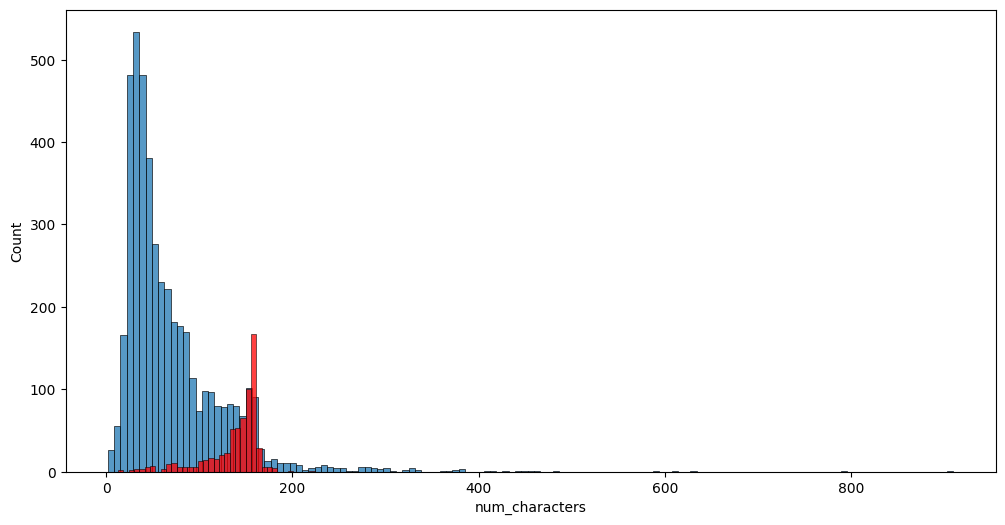

In [155]:
plt.figure(figsize=(12, 6))
sns.histplot(df[df['target'] == 0]['num_characters'])
sns.histplot(df[df['target'] == 1]['num_characters'], color = 'red')


<Axes: xlabel='num_words', ylabel='Count'>

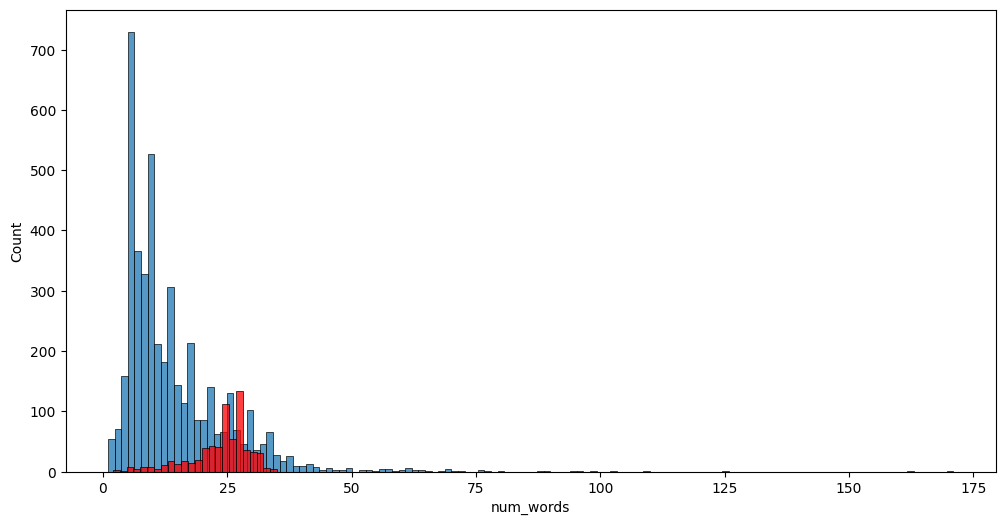

In [156]:
plt.figure(figsize=(12, 6))
sns.histplot(df[df['target'] == 0]['num_words'])
sns.histplot(df[df['target'] == 1]['num_words'], color = 'red')

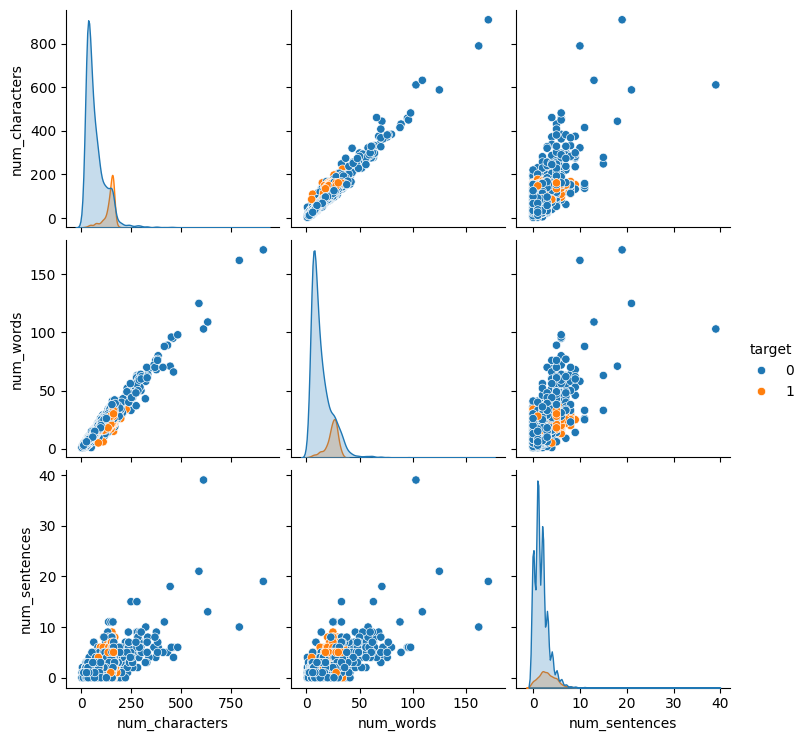

In [157]:
sns.pairplot(df, hue = 'target')

<Axes: >

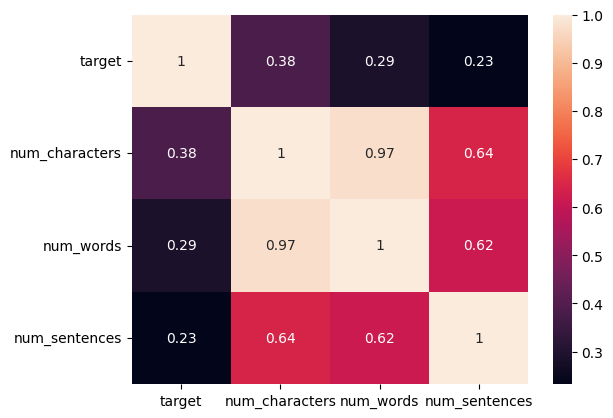

In [158]:
sns.heatmap(df.corr(numeric_only=True),annot=True)

#3 Text Preprocessing

1 - Lower Case,
2 - Tokenization,
3 - Removing spaecial characters,
4 - Removing stop words and puctuations,
5 - Stemming.

In [170]:
import re
import string
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
from nltk.stem.porter import PorterStemmer  # Optional — explained below

ps = PorterStemmer()

def transform_text(text):
    # Lowercase
    text = text.lower()
    
    # Remove special characters and keep only words and numbers
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    
    # Tokenization
    tokens = text.split()
    
    # Remove stopwords
    tokens = [word for word in tokens if word not in ENGLISH_STOP_WORDS]
    
    # Stemming
    tokens = [ps.stem(word) for word in tokens]

    return " ".join(tokens)


In [173]:
df['text'][0]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [171]:
transform_text('Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...')

'jurong point crazi avail bugi n great world la e buffet cine got amor wat'

In [174]:
df['text'][10]

"I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today."

In [175]:
transform_text("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.")

'im gonna home soon dont want talk stuff anymor tonight k ive cri today'

In [177]:
df['transformed_text'] = df['text'].apply(transform_text)

In [178]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,20,3,jurong point crazi avail bugi n great world la...
1,0,Ok lar... Joking wif u oni...,29,6,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,28,1,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,11,2,u dun say earli hor u c say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,13,0,nah dont think goe usf live


In [180]:
#wordcloud
from wordcloud import WordCloud
wc = WordCloud(width=500, height=500, min_font_size=10, background_color='white')

In [181]:
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=' '))

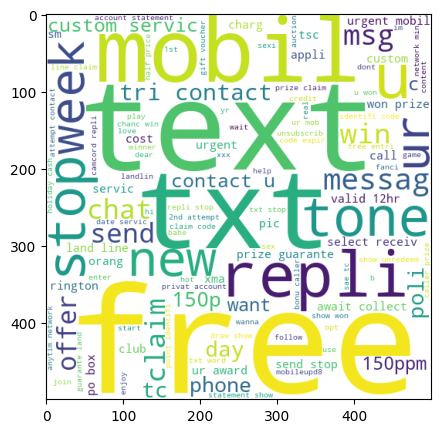

In [183]:
plt.figure(figsize = (10, 5))
plt.imshow(spam_wc)

In [184]:
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=' '))

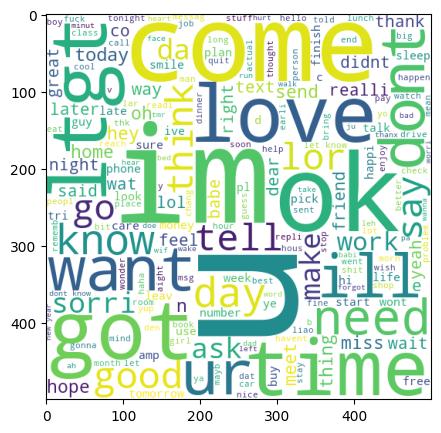

In [185]:
plt.figure(figsize = (10, 5))
plt.imshow(ham_wc)

In [188]:
#top 30 words in spam messages

spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [190]:
len(spam_corpus)

10109

C:\Users\Ebad\AppData\Local\Temp\ipykernel_5704\1658287630.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='word', y='count', data=spam_freq, palette='Reds_r')


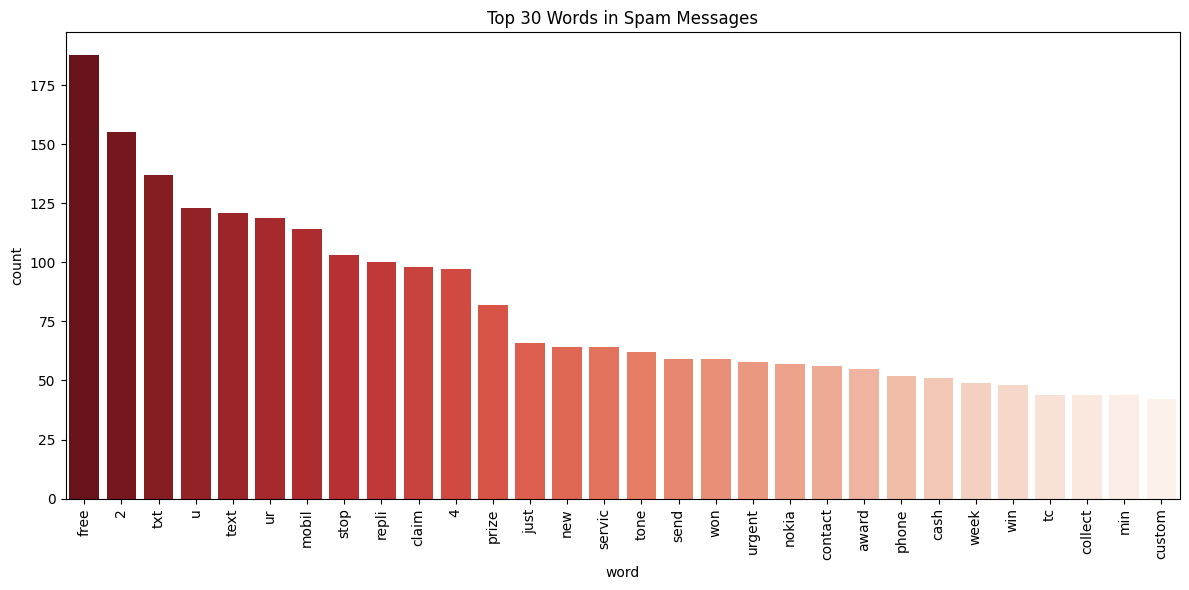

In [ ]:
from collections import Counter

# Prepare top 30 spam words as a DataFrame
spam_freq = pd.DataFrame(Counter(spam_corpus).most_common(30), columns=['word', 'count'])

# Plot
plt.figure(figsize=(12,6))
sns.barplot(x='word', y='count', data=spam_freq, palette='Reds_r')
plt.xticks(rotation='vertical')
plt.title("Top 30 Words in Spam Messages")
plt.tight_layout()
plt.show()


In [203]:
#top 30 words in ham messages

ham_corpus = []
for msg in df[df['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [204]:
len(ham_corpus)

33315

C:\Users\Ebad\AppData\Local\Temp\ipykernel_5704\827298230.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='word', y='count', data=ham_freq, palette='Reds_r')


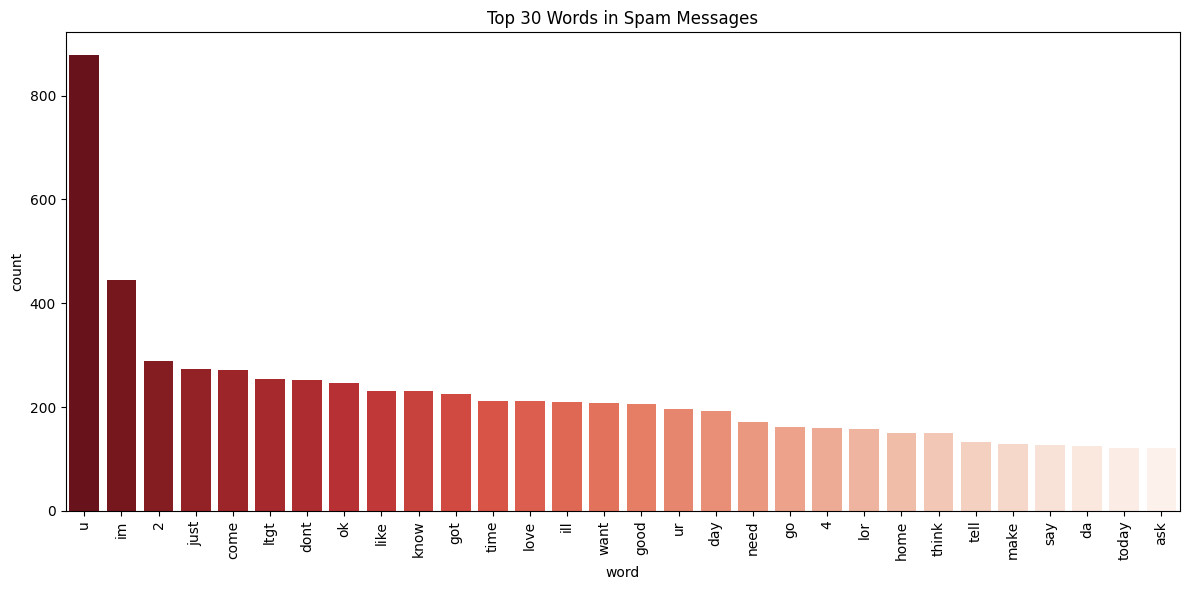

In [205]:
# Prepare top 30 ham words as a DataFrame
ham_freq = pd.DataFrame(Counter(ham_corpus).most_common(30), columns=['word', 'count'])

# Plot
plt.figure(figsize=(12,6))
sns.barplot(x='word', y='count', data=ham_freq, palette='Reds_r')
plt.xticks(rotation='vertical')
plt.title("Top 30 Words in Spam Messages")
plt.tight_layout()
plt.show()

#4 Model Building

#Text vectorization

#Using Bag of Words

In [219]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer
tfidf = TfidfVectorizer()

In [221]:
#X = cv().fit_transform(df['transformed_text']).toarray()
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [222]:
X.shape

(5169, 7878)

In [223]:
y = df['target'].values

In [224]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [225]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 2)

In [226]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [227]:
gnb.fit(X_train, y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test, y_pred1))
print(confusion_matrix(y_test, y_pred1))
print(precision_score(y_test, y_pred1))

0.8665377176015474
[[779 117]
 [ 21 117]]
0.5


In [228]:
mnb.fit(X_train, y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test, y_pred2))
print(confusion_matrix(y_test, y_pred2))
print(precision_score(y_test, y_pred2))

0.9593810444874274
[[896   0]
 [ 42  96]]
1.0


In [229]:
bnb.fit(X_train, y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test, y_pred3))
print(confusion_matrix(y_test, y_pred3))
print(precision_score(y_test, y_pred3))

0.971953578336557
[[894   2]
 [ 27 111]]
0.9823008849557522


*Choosed tfidf ---> MNB due to precision*